# Laboratorio 1: Python Básico, Librerias y Modelamiento Básico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Santiago silva
*Métodos computacionales 2025-I*

---

# 1.
Diseñar un programa en el que entrado  un numero `a`  retorne una variable booleana True or false si cumple que es:

- [Números defectivo](https://es.wikipedia.org/wiki/Número_defectivo) : la suma de los divisores propios es menor que el número.

  La rutina se deberá llamar números_defectivos



- [Números abundantes](https://es.wikipedia.org/wiki/Número_abundante): la suma de los divisores es mayor que el número.

  La rutina se deberá llamar números_abundantes



- [Números semiperfectos](https://es.wikipedia.org/wiki/N%C3%BAmero_semiperfecto) la suma de todos o algunos de los divisores propios es igual al número.

  La rutina se debera llamar numeros_semiperfectos

- [Números perfectos](https://es.wikipedia.org/wiki/N%C3%BAmero_perfecto) la suma de todos sus divisores propios, excepto el mismo numero, es igual al número.

   La rutina se deberá llamar numeros_perfectos


- [Números primos](https://es.wikipedia.org/wiki/N%C3%BAmero_primo) el número es divisible unicamente por sí mismo y por 1.

   La rutina se deberá llamar numeros_primos


**Problema no obligatorio**

Retornar los 30 primeros números de cada clase

In [12]:
def obtener_divisores_propios(n):#con esta funcion vamos a obtener los divisores propios del número, excluyendo al propio número.
    if n == 1:
        return []  #el 1 no tiene divisores propios y es divisor de cualquier número mayor a él
    divisores = [1]

    for i in range(2, int(n**0.5) + 1): #buscamos los divisores desde 2
        if n % i == 0:
            divisores.append(i)
            otro_divisor = n // i

            if otro_divisor != i and otro_divisor != n: #añadimos el divisor complementario si es diferente
                divisores.append(otro_divisor)

    divisores = list(set(divisores)) #eliminamos los duplicados, reordenamos la lista
    divisores.sort()
    return divisores

def numeros_defectivos(n): #números defectivos: suma de divisores propios < n
    suma = sum(obtener_divisores_propios(n))
    return suma < n

def numeros_abundantes(n): #números abundantes: suma de divisores propios > n
    suma = sum(obtener_divisores_propios(n))
    return suma > n

def numeros_perfectos(n): #números perfectos: suma de divisores propios == n
    suma = sum(obtener_divisores_propios(n))
    return suma == n

def numeros_primos(n): #números primos: divisores propios suman 1 (solo divisible por 1 y sí mismo)
    return sum(obtener_divisores_propios(n)) == 1 and n > 1

def numeros_semiperfectos(n): #números semiperfectos: algún subconjunto de divisores suma n
    divisores = obtener_divisores_propios(n)
    suma_total = sum(divisores)
    if suma_total < n:
        return False  #Si la suma total es menor, no puede ser semiperfecto

    num_divisores = len(divisores) #generamos todas las combinaciones

    for mascara in range(1, 1 << num_divisores):  #iteramos sobre las posibles combinaciones, quitando  el conjunto vacío, desde 1 hasta 2^num_divisores - 1
        suma_subconjunto = 0

        for i in range(num_divisores): #verificación
            if mascara & (1 << i):  # si el bit i está activo
                suma_subconjunto += divisores[i]
            if suma_subconjunto > n:  #se detiene si supera a n
                break
        if suma_subconjunto == n:
            return True
    return False

#Encontrar los primeros 30 números de cada clase
def primeros_30_numeros():
    categorias = {
        'defectivos': numeros_defectivos,
        'abundantes': numeros_abundantes,
        'semiperfectos': numeros_semiperfectos,
        'perfectos': numeros_perfectos,
        'primos': numeros_primos
    }
    resultados = {}
    for categoria, funcion in categorias.items():
        numeros = []
        numero = 1
        while len(numeros) < 30:
            if funcion(numero):
                numeros.append(numero)
            numero += 1
        resultados[categoria] = numeros
    return resultados
#####ejemplo
print(numeros_defectivos(24))
print(numeros_abundantes(24))
print(numeros_semiperfectos(24))
print(numeros_primos(24))

False
True
True
False


# 2.
Determine si un número `n` entero ingresado por el usuario es un [palíndromo](https://en.wikipedia.org/wiki/Palindromic_number), (Retorne `True` en caso afirmativo y `False` en caso contrario)

In [15]:
def es_palindromo(n):

    if n < 0: #descartamos los numeros negativos
        return False

    str_n = str(n) #creamos un string
    return str_n == str_n[::-1] #comparamos con su reverso

print(es_palindromo(22)) #ejemplos
print(es_palindromo(-101))

True
False


# 3.
Una característica útil de las funciones definidas por el usuario es la **recursion**, la capacidad de una función de llamarse a sí misma. Por ejemplo, considere la siguiente definición del factorial $n!$ de un entero positivo $n$:

$$n! =
\begin{cases}
1 & \text{si } n = 1, \\
n \times (n - 1)! & \text{si } n > 1.
\end{cases}$$

Esta constituye una definición completa del factorial que nos permite calcular el valor de $n!$ para cualquier entero positivo. Podemos emplear esta definición directamente para crear una función en Python para factoriales, así:



```python
def factorial(n):
    if n == 1:
        return 1
    else:
        return n * factorial(n-1)
```
- Los números de Catalan $C_n$ aparecieron previamente en clase. La definición dada allí puede reescribirse como:

$$C_n =
\begin{cases}
1 & \text{si } n = 0, \\
\frac{4n - 2}{n + 1} \, C_{n-1} & \text{si } n > 0.
\end{cases}$$

Escriba una función en Python, usando recursión, que calcule $C_n$. Utilice su función para calcular e imprimir $C_{50}$.

- Euclides demostró que el máximo común divisor $g(m, n)$ de dos enteros no negativos $m$ y $n$ satisface:

$$g(m, n) =
\begin{cases}
m & \text{si } n = 0, \\
g(n, m \bmod n) & \text{si } n > 0.
\end{cases}$$

Escriba una función en Python $g(m, n)$ que emplee recursión para calcular el máximo común divisor de $m$ y $n$ usando esta fórmula. Use su función para calcular e imprimir el máximo común divisor de 108 y 192.


In [16]:
def catalan(n):
    if n == 0: #el primer paramétro, si n == 0, nos regresa 1
        return 1
    else:
        return ((4 * n - 2) * catalan(n - 1)) // (n + 1)


def mcd(m, n):
    if n == 0:
        return m
    else:
        return mcd(n, m % n) #halla el mcd según método euclides

#calculamos el catalan de 50 y el mcd de 108, 192
print(catalan(50))
print(mcd(108, 192))

1978261657756160653623774456
12


# 4.
Un problema conocido de mecánica cuántica involucra una partícula de masa $m$ que encuentra un escalón de potencial unidimensional, como se muestra en la figura:

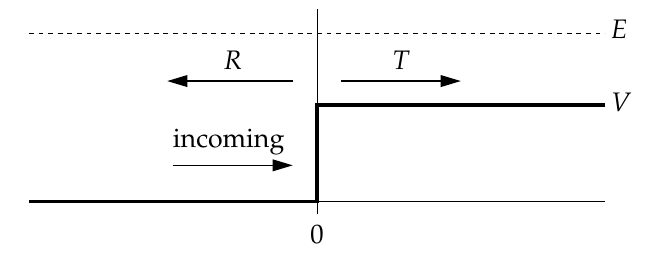


La partícula con energía cinética inicial $E$ y vector de onda $k_1 = \sqrt{2mE}/\hbar$ entra desde la izquierda y encuentra un salto abrupto en la energía potencial de altura $V$ en la posición $x = 0$. Resolviendo la ecuación de Schrödinger, se puede demostrar que cuando $E > V$ la partícula puede:
- Pasar el escalón, en cuyo caso tendrá una energía cinética menor $E - V$ al otro lado y un vector de onda correspondientemente más pequeño $k_2 = \sqrt{2m(E - V)}/\hbar$
- Ser reflejada, manteniendo toda su energía cinética y vector de onda sin cambios, pero moviéndose en dirección opuesta.


Las probabilidades $T$ y $R$ para transmisión y reflexión están dadas por:

$$T = \frac{4k_1k_2}{(k_1 + k_2)^2}, \quad R = \left(\frac{k_1 - k_2}{k_1 + k_2}\right)^2.$$

Consideremos una partícula con masa igual a la del electrón $m = 9.11 \times 10^{-31} \, \text{kg}$ y energía $10 \, \text{eV}$ que encuentra un escalón de potencial de altura $9 \, \text{eV}$. Escriba un programa en Python para calcular e imprimir las probabilidades de transmisión y reflexión usando las fórmulas anteriores.


In [17]:
import math
#parametros
m = 9.11e-31          #masa del electrón en kg
eV_to_J = 1.60218e-19 #conversión de eV a Joules
hbar = 1.0545718e-34  #constante de Planck reducida en J*s

#energías en eV y conversión a Joules
E_eV = 10 #energía de la partícula en eV
V_eV = 9 #altura del escalón en eV
E = E_eV * eV_to_J #Conversión a J
V = V_eV * eV_to_J #Conversión a J

#definimos los vectores k1, k2 y realizamos su cálculo
k1 = math.sqrt(2 * m * E) / hbar
k2 = math.sqrt(2 * m * (E - V)) / hbar

T = (4 * k1 * k2) / (k1 + k2)**2 #probabilidad de transmisión
R = ((k1 - k2) / (k1 + k2))**2 #probabilidad de reflexión

print(f"Probabilidad de Transmisión (T): {T:.10f} o {T*100:.2f}%")
print(f"Probabilidad de Reflexión (R): {R:.10f} o {R*100:.2f}%")

Probabilidad de Transmisión (T): 0.7301261364 o 73.01%
Probabilidad de Reflexión (R): 0.2698738636 o 26.99%


# 5.
La órbita en el espacio de un cuerpo alrededor de otro, como un planeta alrededor del Sol, no necesita ser circular. En general toma la forma de una elipse, con el cuerpo a veces más cerca y a veces más lejos. Si se conocen la distancia $\ell_{1}$ del acercamiento más próximo que hace un planeta al Sol, llamado perihelio, y su velocidad lineal $v_{1}$ en el perihelio, entonces cualquier otra propiedad de la órbita puede calcularse a partir de estos dos datos de la siguiente manera.
La segunda ley de Kepler nos dice que la distancia $\ell_{2}$ y velocidad $v_{2}$ del planeta en su punto más distante, o afelio, satisfacen $\ell_{2}v_{2}=\ell_{1}v_{1}$. Al mismo tiempo, la energía total, cinética más gravitacional, de un planeta con velocidad $v$ y distancia $r$ del Sol está dada por
    $$
    E = \tfrac{1}{2}mv^{2} - G\frac{mM}{r},
    $$
    donde $m$ es la masa del planeta, $M=1.9891\times 10^{30}\,\mathrm{kg}$ es la masa del Sol, y $G=6.6738\times 10^{-11}\,\mathrm{m}^{3}\,\mathrm{kg}^{-1}\,\mathrm{s}^{-2}$ es la constante gravitacional de Newton. Dado que la energía debe conservarse, se llega a que $v_{2}$ es la raíz más pequeña de la ecuación cuadrática
    $$
    v_{2}^{2} - \frac{2GM}{v_{1}\ell_{1}}v_{2} - \left[v_{1}^{2} - \frac{2GM}{\ell_{1}}\right] = 0.
    $$
    Una vez que se tiene $v_{2}$, podemos calcular $\ell_{2}$ usando la relación $\ell_{2}=\ell_{1}v_{1}/v_{2}$.

- Dados los valores de $v_{1}$, $\ell_{1}$, y $\ell_{2}$, otros parámetros de la órbita vienen dados por fórmulas simples que pueden derivarse de las leyes de Kepler y del hecho de que la órbita es una elipse:
$$
    \text{Semieje mayor:}  \quad a = \tfrac{1}{2}(\ell_{1}+\ell_{2}),
$$
$$
    \text{Semieje menor:}  \quad b = \sqrt{\ell_{1}\ell_{2}},
$$
$$
    \text{Periodo orbital:}  \quad T = \frac{2\pi ab}{\ell_{1}v_{1}},
$$
$$
    \text{Excentricidad orbital:}  \quad e = \frac{\ell_{2}-\ell_{1}}{\ell_{2}+\ell_{1}}.
$$

Escriba un programa que solicite al usuario ingresar la distancia al Sol y la velocidad en el perihelio, luego calcule e imprima las cantidades $\ell_{2}$, $v_{2}$, $T$, y $e$.

- Pruebe su programa calculando las propiedades de las órbitas de la Tierra (para la cual $\ell_{1}=1.4710\times 10^{11}\,\mathrm{m}$ y $v_{1}=3.0287\times 10^{4}\,\mathrm{m}\,\mathrm{s}^{-1}$) y del cometa Halley ($\ell_{1}=8.7830\times 10^{10}\,\mathrm{m}$ y $v_{1}=5.4529\times 10^{4}\,\mathrm{m}\,\mathrm{s}^{-1}$). Entre otras cosas, debería encontrar que el período orbital de la Tierra es un año y el del cometa Halley es alrededor de 76 años.


In [20]:

G = 6.6738e-11 # Constante gravitacional en m^3 kg^-1 s^-2
M = 1.9891e30 #Masa del Sol en kg

#datos de los cuerpos celestes (l_1 en metros, v1 en m/s)
cuerpos = {
    "Tierra": {
        "ℓ1": 1.4710e11,
        "v1": 3.0287e4
    },
    "Cometa Halley": {
        "ℓ1": 8.7830e10,
        "v1": 5.4529e4
    }
}

def calcular_orbita(nombre, datos):
    l1 = datos["ℓ1"]
    v1 = datos["v1"]

    coeficiente_b = (2 * G * M) / (v1 * l1) #calculo de los coeficientes de la cuadratica
    coeficiente_c = -(v1**2 - (2 * G * M / l1))

    discriminante = coeficiente_b**2 + 4 * (v1**2 - (2 * G * M / l1)) #hallamos el discriminante

    sqrt_discriminante = math.sqrt(discriminante)  #calculo de las raíces de la cuadrática
    v2_raiz1 = (coeficiente_b + sqrt_discriminante) / 2
    v2_raiz2 = (coeficiente_b - sqrt_discriminante) / 2

    v2 = min(v2_raiz1, v2_raiz2) if min(v2_raiz1, v2_raiz2) > 0 else max(v2_raiz1, v2_raiz2) #se selecciona la raíz más pequeña y positiva

    l2 = (l1 * v1) / v2 #aplicando segunda ley de kepler, calculamos l_2

    semieje_mayor = (l1 + l2) / 2 #calculo de los parámetros orbitales
    semieje_menor = math.sqrt(l1 * l2)
    periodo_orbital = (2 * math.pi * semieje_mayor * semieje_menor) / (l1 * v1)
    excentricidad = (l2 - l1) / (l2 + l1)

    periodo_anos = periodo_orbital / (365.25 * 24 * 3600) #pasamos a años

    # Resultados
    print(f"\n°-° {nombre} °-°")
    print(f"ℓ_1 (perihelio): {l1:.4e} m")
    print(f"ℓ_2 (afelio): {l2:.4e} m")
    print(f"v_1: {v1:.2f} m/s")
    print(f"v_2: {v2:.2f} m/s")
    print(f"Semieje mayor (a): {semieje_mayor:.4e} m")
    print(f"Semieje menor (b): {semieje_menor:.4e} m")
    print(f"Periodo orbital (T): {periodo_anos:.2f} años")
    print(f"Excentricidad (e): {excentricidad:.4f}")

for nombre, datos in cuerpos.items():
    calcular_orbita(nombre, datos)


°-° Tierra °-°
ℓ_1 (perihelio): 1.4710e+11 m
ℓ_2 (afelio): 1.5203e+11 m
v_1: 30287.00 m/s
v_2: 29305.40 m/s
Semieje mayor (a): 1.4956e+11 m
Semieje menor (b): 1.4954e+11 m
Periodo orbital (T): 1.00 años
Excentricidad (e): 0.0165

°-° Cometa Halley °-°
ℓ_1 (perihelio): 8.7830e+10 m
ℓ_2 (afelio): 5.2822e+12 m
v_1: 54529.00 m/s
v_2: 906.68 m/s
Semieje mayor (a): 2.6850e+12 m
Semieje menor (b): 6.8113e+11 m
Periodo orbital (T): 76.03 años
Excentricidad (e): 0.9673


# 6.
Un proyectil es lanzado desde una altura inicial $y_0 = 0$ con una velocidad inicial de $4.0\, \text{m/s}$ a $45^\circ$ respecto a la horizontal. Graficar la trayectoria del proyectil en su plano de movimiento (considerando el eje $x$ paralelo a la horizontal y el origen en la posición inicial del proyectil) desde el punto de lanzamiento hasta el punto donde impacta el suelo (asumiendo un terreno plano). La gráfica debe incluir etiquetas en los ejes y un título. Recuerde que las ecuaciones del movimiento parabólico están dadas por

$$
\text{Posición horizontal:} \quad x(t) = v_{0x} t = v_0 \cos\theta \cdot t
$$
$$
\text{Posición vertical:} \quad y(t) = y_0 + v_{0y} t - \frac{1}{2}gt^2 = y_0 + v_0 \sin\theta \cdot t - \frac{1}{2}gt^2
$$
$$
\text{Velocidad horizontal:} \quad v_x(t) = v_{0x} =v_0 \cos \theta= \text{constante}
$$
$$
\text{Velocidad vertical:} \quad v_y(t) = v_{0y} - gt = v_0 \sin\theta - gt
$$

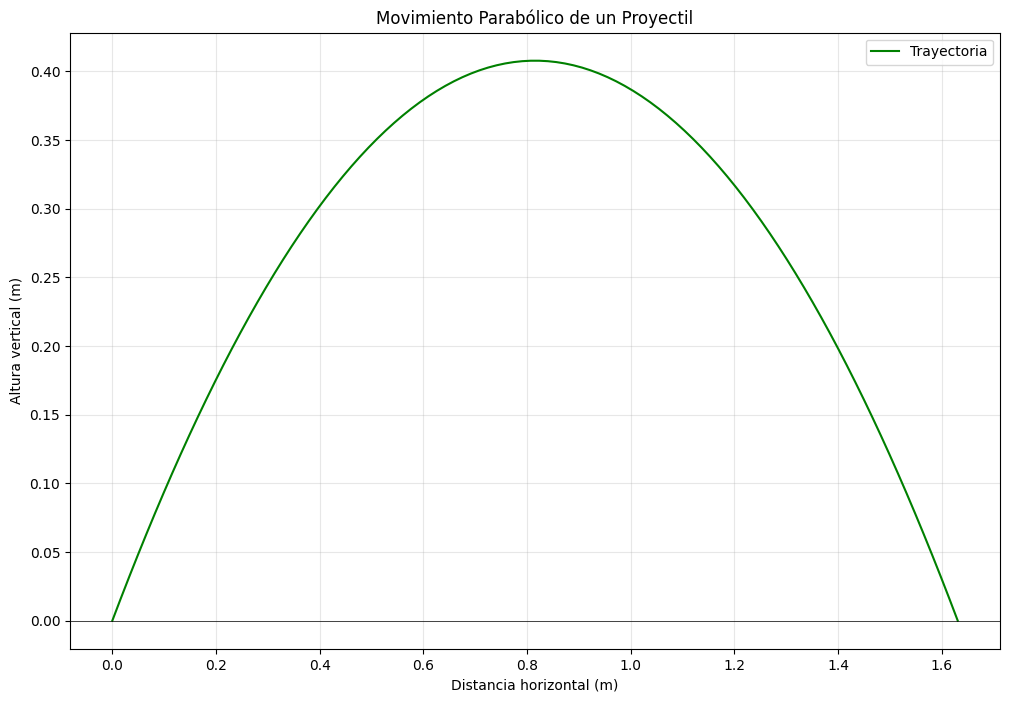

 Componentes de Velocidad 
Velocidad horizontal inicial (v₀ₓ): 2.828 m/s
Velocidad vertical inicial (v₀ᵧ): 2.828 m/s



In [21]:
import numpy as np
import matplotlib.pyplot as plt

v0 = 4.0 #velocidad inicial en m/s
theta = 45 #angulo de lanzamiento en grados
g = 9.81 #aceleración gravitacional en m/s²
y0 = 0 #altura inicial

theta_rad = math.radians(theta) #pasamos el angulo a rad

v0x = v0 * math.cos(theta_rad) #componentes de las velocidades iniciales
v0y = v0 * math.sin(theta_rad)

tiempo_vuelo = (2 * v0y) / g

t = np.linspace(0, tiempo_vuelo, 100) #hacemos un array de tiempos

x = v0x * t #calculamos posicion en x
y = y0 + v0y * t - 0.5 * g * t**2 #calculamos posición en Y

plt.figure(figsize=(12, 8))
plt.plot(x, y, color='green', linewidth=1.5, label="Trayectoria")
plt.title("Movimiento Parabólico de un Proyectil")
plt.xlabel("Distancia horizontal (m)")
plt.ylabel("Altura vertical (m)")
plt.grid(True, alpha = 0.3,)
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

print(" Componentes de Velocidad ")
print(f"Velocidad horizontal inicial (v₀ₓ): {v0x:.3f} m/s")
print(f"Velocidad vertical inicial (v₀ᵧ): {v0y:.3f} m/s\n")

# 7.

Los polinomios de Legendre son de gran importancia en física, especialmente en la solución de la ecuación de Laplace en coordenadas esféricas. Son fundamentales en la expansión en armónicos esféricos, lo que los hace esenciales en problemas de mecánica cuántica y electromagnetismo. Cada polinomio de Legendre $P_n(x)$ es un polinomio de grado $n$. Este puede ser expresado usando la Fórmula de Rodrigues:
     
$$
P_n (x)=\frac{1}{n!\ 2^n} \frac{d^n}{dx^n} (x^2-1)^n, \ \ n \in  \mathbb{Z^{+}}+\{0\}
$$
        
- Utilizando la fórmula de Rodrigues halle $P_0(x)$ y $P_1(x)$.
-  Con la fórmula de recurrencia
$$
            P_{j+1}(x)=\frac{(2j+1)x P_j (x)-jP_{j-1}(x)}{j+1},
$$
elabore un código que permita calcular $P_n(x)$ para $n\geq2$.
- En una misma gráfica muestre $P_n(x)$ para $1\leq n\leq5$.


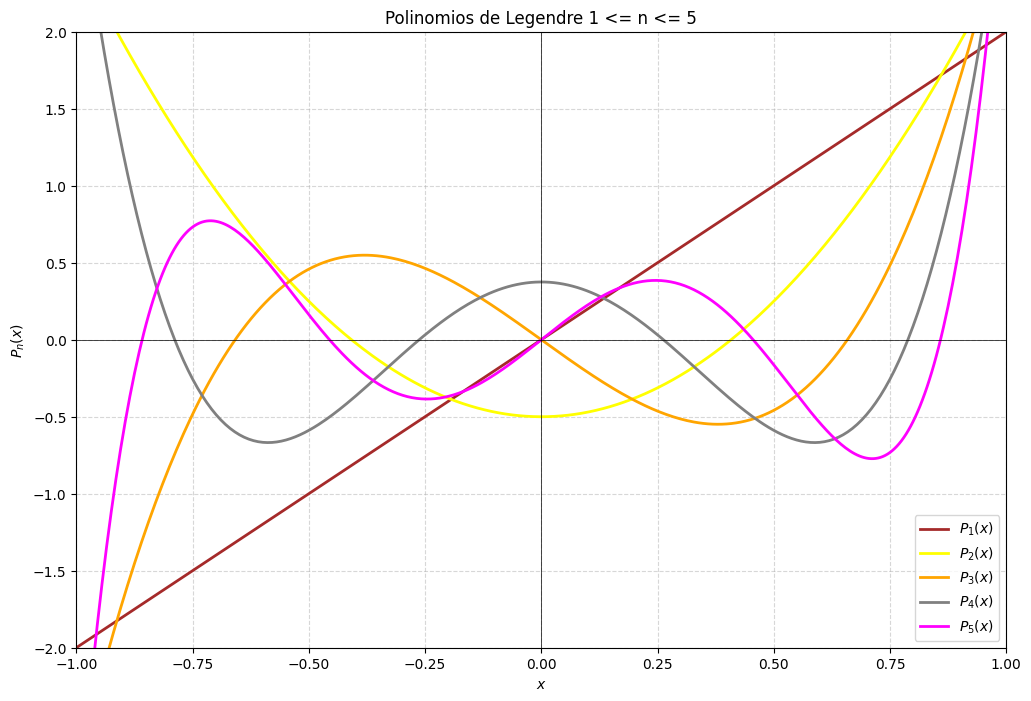

In [22]:
def multiplicar_por_x(polinomio): #desplaza los coeficientes, pues, multiplica un polinomio por x
    return [0] + polinomio

def multiplicar_escalar(polinomio, escalar): #multiplica el polinomio por un escalar
    return [coef * escalar for coef in polinomio]

def sumar_polinomios(p1, p2): #suma dos polinomios de diferente grad
    max_len = max(len(p1), len(p2))
    p1_ext = p1 + [0]*(max_len - len(p1))
    p2_ext = p2 + [0]*(max_len - len(p2))
    return [a + b for a, b in zip(p1_ext, p2_ext)]

def restar_polinomios(p1, p2):
    return sumar_polinomios(p1, multiplicar_escalar(p2, -1)) #resta de p2 a p1

def evaluar_polinomio(p, x):
    return sum(coef * x**i for i, coef in enumerate(p))

#polinomios base
P = {
    0: [1],      # P0(x) = 1
    1: [0, 2]    # P1(x) = 2x (según fórmula modificada)
}

for n in range(2, 6): #generamos los polinomios hasta n = 5
    term1 = multiplicar_escalar(multiplicar_por_x(P[n-1]), (2*(n-1)+1))
    term2 = multiplicar_escalar(P[n-2], (n-1))
    P_n = multiplicar_escalar(restar_polinomios(term1, term2), 1/n)
    P[n] = P_n

x = np.linspace(-1, 1, 400)
plt.figure(figsize=(12, 8))
colors = ['brown', 'yellow', 'orange', 'grey', 'magenta']

#graficamos de p_1 a p_5
for n in range(1, 6):
    y = [evaluar_polinomio(P[n], xi) for xi in x]
    plt.plot(x, y, color=colors[n-1], label=f'$P_{n}(x)$', linewidth=2)

# Añadir detalles estéticos
plt.title('Polinomios de Legendre 1 <= n <= 5')
plt.xlabel('$x$')
plt.ylabel('$P_n(x)$')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-1, 1)
plt.ylim(-2, 2)
plt.show()